In [1]:
##################################################
##################################################
######## IMPORT THE RELEVANT LIBRARIES
##################################################
##################################################
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from urllib.request import urlopen
from bs4 import BeautifulSoup
# setup a style to view ipython notebook graphs
sns.set_style('whitegrid')
sns.set_context('notebook')

%matplotlib inline
import datetime

from scipy.stats import ttest_ind
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter



In [3]:
import pandas as pd
from sodapy import Socrata

In [10]:
####### grabbing the data regarding active dog licenses in 2016
client = Socrata("data.cityofnewyork.us", None)
results = client.get("5hyw-n69x", limit=200000)
active_dog_licenses_2016 = pd.DataFrame.from_records(results)

In [19]:
######## First thing to note is that each row is not unique, because a dog can have several licenses
### we need to make a unique key for each dog

unique_dogs = active_dog_licenses_2016[['animalbirth', 'animalgender', 'animalname', 'breedname']].drop_duplicates()
unique_dogs['unique_dog_key'] = unique_dogs.index + 1


In [21]:
full_dataset = active_dog_licenses_2016.merge(unique_dogs, on = ['animalbirth', 'animalgender', 'animalname', 'breedname'])

###full_dataset.head()

,animalbirth,animalgender,animalname,borough,breedname,censustract2010,citycouncildistrict,communitydistrict,congressionaldistrict,licenseexpireddate,licenseissueddate,nta,rownumber,statesenatorialdistrict,zipcode,unique_dog_key
0,2000-01-01T00:00:00.000,M,SHADOW,Brooklyn,Beagle,1014,46,318,8,2016-01-30T00:00:00.000,2014-12-29T00:00:00.000,BK50,1753,19,11236,1
1,2000-01-01T00:00:00.000,M,SHADOW,Brooklyn,Beagle,1014,46,318,8,2017-01-30T00:00:00.000,2016-03-11T00:00:00.000,BK50,58229,19,11236,1
2,2011-10-01T00:00:00.000,M,ROCCO,Brooklyn,Boxer,756,45,314,9,2016-01-30T00:00:00.000,2015-01-07T00:00:00.000,BK43,2415,17,11210,2
3,2011-10-01T00:00:00.000,M,ROCCO,Brooklyn,Boxer,756,45,314,9,2017-01-30T00:00:00.000,2015-12-14T00:00:00.000,BK43,43341,17,11210,2
4,2005-09-01T00:00:00.000,M,LUIGI,Bronx,Maltese,516,13,210,14,2016-02-02T00:00:00.000,2015-01-17T00:00:00.000,BX10,3328,34,10464,3


In [24]:
print("What's the most popular dog breed?")

What's the most popular dog breed?


In [28]:
#### create a dataframe with the count of unique dogs by breed
count_of_dogs_by_breed = full_dataset.groupby('breedname', as_index=False).agg({"unique_dog_key": "nunique"}).sort_values(by = 'unique_dog_key', ascending = False)
#### remove the "unknown" group
count_of_dogs_by_breed = count_of_dogs_by_breed[count_of_dogs_by_breed['breedname'] != 'Unknown']

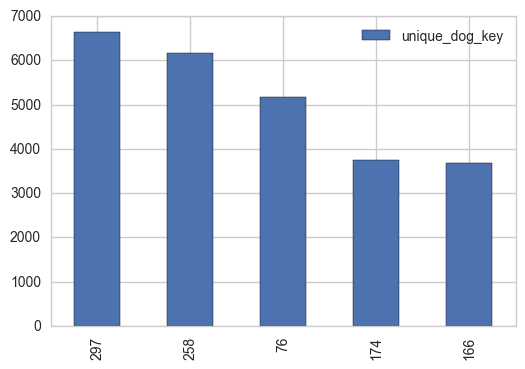

In [35]:
count_of_dogs_by_breed.head(5).plot(kind='bar')

In [33]:
count_of_dogs_by_breed.head()

,breedname,unique_dog_key
297,Yorkshire Terrier,6637
258,Shih Tzu,6167
76,Chihuahua,5164
174,Maltese,3747
166,Labrador Retriever,3686
